# アタポン
* アタポンの1位データに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* イベント期間(h)を使って、時変係数モデルにしてみる

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../../common/event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,1位,2001位,形式,属性,期間
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,324369,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,350000,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,520000,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,602529,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,523819,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,530000,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,666666,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,844167,58517,アタポン,NaN,198.0


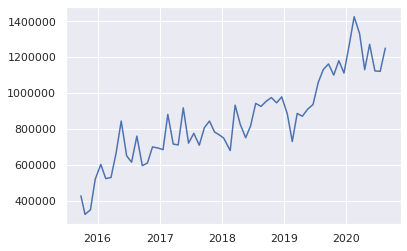

In [5]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '1位']
ax.plot(x, y)
plt.show()

## ローカルレベル+時系変数モデル

### stanデータ準備

In [6]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
}

In [7]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準成分の推定値
  real<lower=0> s_t; // ev_lenの係数の変化を表す標準偏差
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

### Stan実行

In [8]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_63f10cc5788edc3d10735e32da228d2c NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmp_txmx8u9\stanfit4anon_model_63f10cc5788edc3d10735e32da228d2c_5379360927624882096.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 23.3 s


In [9]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [10]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 43.1 s


In [11]:
# ファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c4_1_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c4_1_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


### 結果確認

In [12]:
fit

Inference for Stan model: anon_model_63f10cc5788edc3d10735e32da228d2c.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  1179.0   70.84 813.89 -276.2 602.05 1127.9 1682.6 2955.7    132   1.01
b_len[1]  1166.8   70.28 750.39 -146.2 649.69 1098.6 1619.9 2904.4    114   1.01
b_len[2]  1411.3   67.19 739.11  73.77 901.34 1370.0 1858.4 3011.6    121   1.01
b_len[3]  1700.2   44.21 622.09 600.27 1265.6 1653.6 2100.5 3064.0    198   1.01
b_len[4]  2122.7   40.56 624.39  945.0 1676.4 2108.7 2545.8 3373.1    237   1.02
b_len[5]  2085.4   40.28 636.84 906.27 1637.3 2066.0 2519.0 3366.5    250   1.02
b_len[6]  2196.3   39.62 631.49 1009.0 1754.0 2173.1 2632.9 3458.0    254   1.02
b_len[7]  2589.6   36.09 596.36 1463.1 2176.0 2568.9 3009.4 3716.2    273   1.02
b_len[8]  2872.8   34.96 576.53 1769.1 2462.0 2870.8 3281.5 3991.9    272   1.03
b

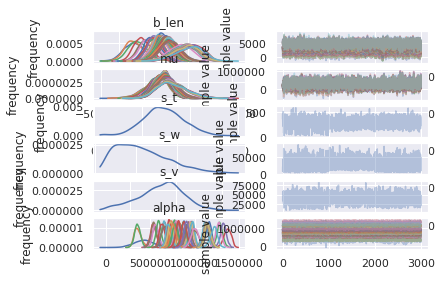

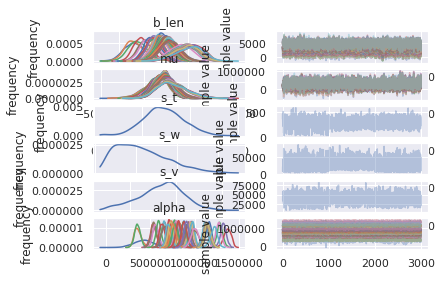

In [13]:
fit.plot()

In [14]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


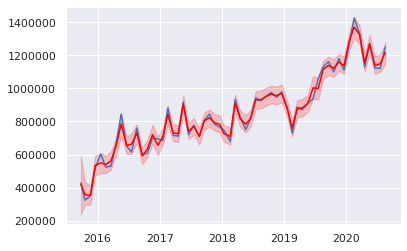

In [16]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

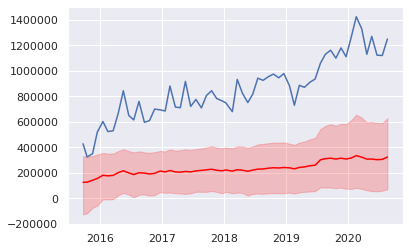

In [17]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

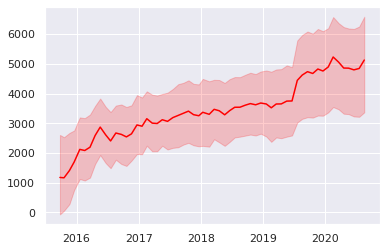

In [18]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_len_mean, c='red')
plt.fill_between(X, b_len_5, b_len_95, color='red', alpha=0.2)
plt.show()

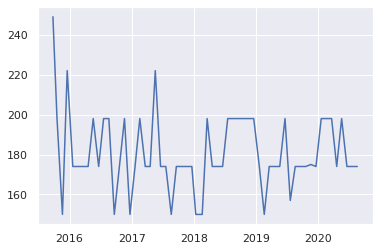

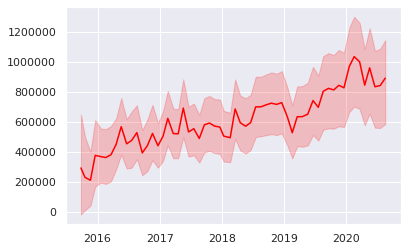

In [19]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['1位'], label='observed')
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

## ローカル線形トレンド+時系変数モデル

### stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
}

In [6]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
  real<lower=0> s_t; // lenの係数の変化を表す標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

### Stan実行

In [22]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f33c2889669abe2a05c72aa58f80b244 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpjsqg518u\stanfit4anon_model_f33c2889669abe2a05c72aa58f80b244_4020734401916496471.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 23.1 s


In [23]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [24]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 59 s


In [25]:
# ファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c4_2_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c4_2_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


### 結果確認

In [8]:
# 読み込み
input_dir = '../event_data/'
with open(input_dir + 'c4_2_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c4_2_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
fit

Inference for Stan model: anon_model_f33c2889669abe2a05c72aa58f80b244.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  1979.2  105.43 948.86  78.08 1314.3 2036.7 2672.4 3626.3     81   1.05
b_len[1]  1977.2  106.23 907.66 286.87 1328.5 2015.5 2647.1 3590.4     73   1.06
b_len[2]  2165.7   98.82 861.51 400.21 1548.4 2224.0 2761.6 3683.5     76   1.05
b_len[3]  2321.1   83.88 745.54 857.05 1792.2 2340.7 2834.2 3704.7     79   1.05
b_len[4]  2640.2   69.92 681.48 1213.7 2204.5 2665.5 3102.1 3878.6     95   1.03
b_len[5]  2599.2   72.29 700.84 1166.0 2119.2 2634.8 3092.2 3886.3     94   1.03
b_len[6]  2668.3   66.86  685.1 1364.2 2197.2 2709.2 3132.5 3929.5    105   1.02
b_len[7]  2931.8   58.07 622.74 1697.2 2524.7 2952.7 3349.2 4076.9    115   1.02
b_len[8]  3117.0   51.28 577.92 1931.3 2757.8 3132.9 3501.8 4226.0    127   1.01
b

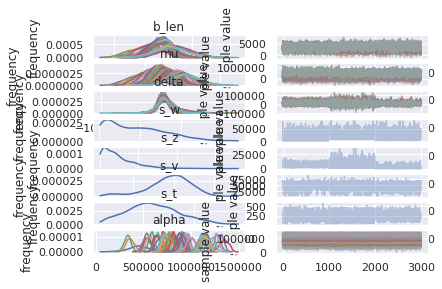

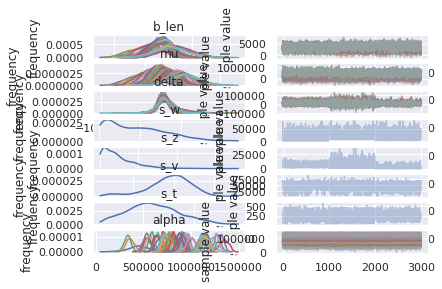

In [10]:
fit.plot()

In [11]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# delta
# 事後平均
delta_mean = ms['delta'].mean(axis=0)
# #95パーセンタイル抽出
delta_5 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 5), axis=0))
delta_95 = np.array(pd.DataFrame(ms['delta']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


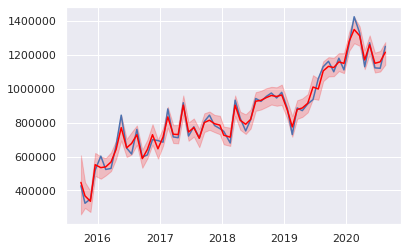

In [12]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

In [13]:
# 予測の正解率
# 90%区間に入ってる率
actual = df['1位'].tolist()
pred_low = alpha_5
pred_high = alpha_95

cnt_all = len(actual)
cnt_collect = ((pred_low < actual) & (actual < pred_high)).sum()
print('全数:', cnt_all)
print('正解数:', cnt_collect)
print('正解率:', cnt_collect / cnt_all) 

全数: 60
正解数: 55
正解率: 0.9166666666666666


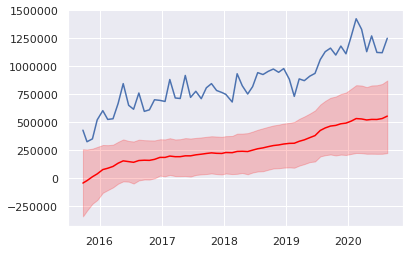

In [14]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

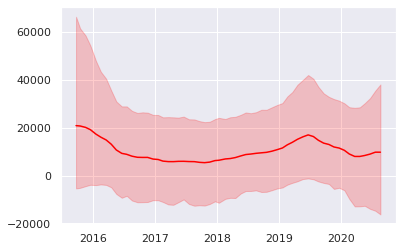

In [15]:
# delta
# トレンド成分の変化量
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, delta_mean, label='predicted trend', c='red')
plt.fill_between(X, delta_5, delta_95, color='red', alpha=0.2)
plt.show()

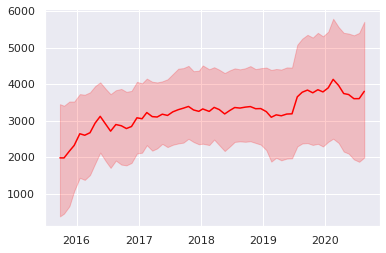

In [16]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_len_mean, c='red')
plt.fill_between(X, b_len_5, b_len_95, color='red', alpha=0.2)
plt.show()

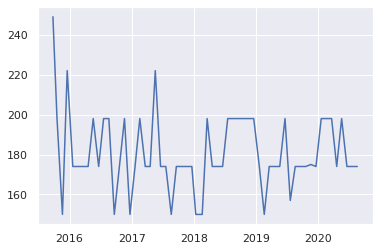

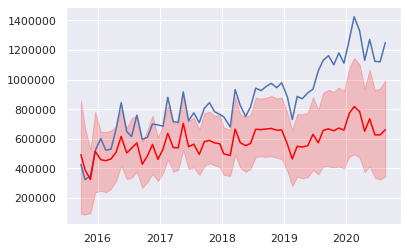

In [17]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['1位'], label='observed')
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

### 予測のズレ確認

In [45]:
df['予測1位'] = alpha_mean
# 予測とのズレ（比）
df['ズレ(差)'] = df['1位'] - df['予測1位']
df['ズレ(比)'] = df['1位'] / df['予測1位']
df.drop(['2001位', '形式', '属性'], axis=1, inplace=True)

In [46]:
df.head()

,イベント,1位,期間,予測1位,ズレ,ズレ(差),ズレ(比)
日付,,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,249.0,447495.932805,0.955935,-19718.932805,0.955935
2015-10-19,Nation Blue,324369,198.0,367946.097668,0.881567,-43577.097668,0.881567
2015-11-20,Orange Sapphire,350000,150.0,336002.362487,1.041659,13997.637513,1.041659
2015-12-18,Snow Wings,520000,222.0,551894.080827,0.942210,-31894.080827,0.942210
2016-01-20,パステルピンクな恋,602529,174.0,534661.277578,1.126936,67867.722422,1.126936


In [49]:
# ズレ(比)
# - 平均は約1（そこを狙ってモデル作られているので、コレは当たり前）
# - 標準偏差0.043 = 68%は±4.3%に入る
# - 最大のズレは約13%（min, max）
# - 50%はズレ3.3%未満（25%-75%）
# ズレ(差)
# - 平均は約-333
# - 標準偏差32673
# - 中央値は約90
df.describe()

,1位,期間,予測1位,ズレ(差),ズレ(比)
count,6.000000e+01,60.000000,6.000000e+01,60.000000,60.000000
mean,8.514374e+05,180.983333,8.517708e+05,-333.359006,0.997731
std,2.409591e+05,19.308812,2.338540e+05,32673.412967,0.043910
min,3.243690e+05,150.000000,3.360024e+05,-74107.714337,0.881567
25%,6.985632e+05,174.000000,7.148888e+05,-25562.832453,0.967906
50%,8.349745e+05,174.000000,8.140478e+05,89.529252,1.000040
75%,9.757640e+05,198.000000,9.721621e+05,18348.402305,1.019890
max,1.424681e+06,249.000000,1.349448e+06,75233.078199,1.126936


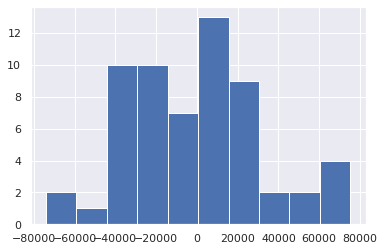

In [50]:
# プロット
df['ズレ(差)'].hist()

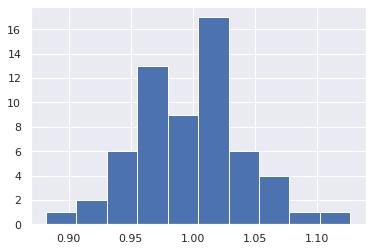

In [51]:
# プロット
df['ズレ(比)'].hist()

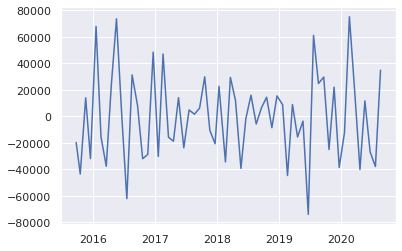

In [52]:
# プロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['ズレ(差)'])
plt.show()

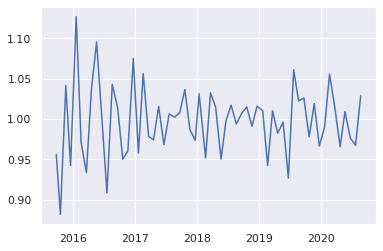

In [53]:
# プロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['ズレ(比)'])
plt.show()

In [60]:
# 日付も変数にする
df.reset_index(inplace=True)

In [64]:
df['year'] = df['日付'].apply(lambda x: x.year)
df['month'] = df['日付'].apply(lambda x: x.month)
df['day'] = df['日付'].apply(lambda x: x.day)

In [67]:
df.sort_values('ズレ(差)', ascending=False)

,日付,イベント,1位,期間,予測1位,ズレ(差),ズレ(比),year,month,day
53,2020-02-18,印象,1424681,198.0,1.349448e+06,75233.078199,1.055751,2020,2,18
8,2016-05-19,明日また会えるよね,844167,198.0,7.704638e+05,73703.235786,1.095661,2016,5,19
4,2016-01-20,パステルピンクな恋,602529,174.0,5.346613e+05,67867.722422,1.126936,2016,1,20
46,2019-07-22,バベル,1059763,157.0,9.985850e+05,61177.993525,1.061265,2019,7,22
15,2016-12-21,あんきら!?狂騒曲,694253,150.0,6.457701e+05,48482.947755,1.075078,2016,12,21
17,2017-02-17,情熱ファンファンファーレ,881000,198.0,8.339353e+05,47064.748436,1.056437,2017,2,17
59,2020-08-19,ヒーローヴァーサスレイナンジョー,1250000,174.0,1.215182e+06,34818.031312,1.028653,2020,8,19
11,2016-08-19,Near to You,760307,198.0,7.289864e+05,31320.636329,1.042965,2016,8,19
25,2017-10-20,Halloween♥Code,844167,174.0,8.143414e+05,29825.645125,1.036625,2017,10,20
48,2019-09-20,ステップ＆スキップ,1161870,174.0,1.132201e+06,29668.868662,1.026205,2019,9,20


In [68]:
df.sort_values('ズレ(比)', ascending=False)

,日付,イベント,1位,期間,予測1位,ズレ(差),ズレ(比),year,month,day
4,2016-01-20,パステルピンクな恋,602529,174.0,5.346613e+05,67867.722422,1.126936,2016,1,20
8,2016-05-19,明日また会えるよね,844167,198.0,7.704638e+05,73703.235786,1.095661,2016,5,19
15,2016-12-21,あんきら!?狂騒曲,694253,150.0,6.457701e+05,48482.947755,1.075078,2016,12,21
46,2019-07-22,バベル,1059763,157.0,9.985850e+05,61177.993525,1.061265,2019,7,22
17,2017-02-17,情熱ファンファンファーレ,881000,198.0,8.339353e+05,47064.748436,1.056437,2017,2,17
53,2020-02-18,印象,1424681,198.0,1.349448e+06,75233.078199,1.055751,2020,2,18
11,2016-08-19,Near to You,760307,198.0,7.289864e+05,31320.636329,1.042965,2016,8,19
2,2015-11-20,Orange Sapphire,350000,150.0,3.360024e+05,13997.637513,1.041659,2015,11,20
7,2016-04-19,つぼみ,666666,174.0,6.425936e+05,24072.380943,1.037461,2016,4,19
25,2017-10-20,Halloween♥Code,844167,174.0,8.143414e+05,29825.645125,1.036625,2017,10,20


In [69]:
# 相関行列
df.corr()

,1位,期間,予測1位,ズレ(差),ズレ(比),year,month,day
1位,1.000000,0.100235,0.990975,0.282053,0.282205,0.891693,-0.084861,-0.015156
期間,0.100235,1.000000,0.107524,-0.030376,-0.129715,-0.115226,0.115865,0.117452
予測1位,0.990975,0.107524,1.000000,0.150906,0.158426,0.914068,-0.075583,0.002148
ズレ(差),0.282053,-0.030376,0.150906,1.000000,0.947295,0.033762,-0.084865,-0.127146
ズレ(比),0.282205,-0.129715,0.158426,0.947295,1.000000,0.065221,-0.098652,-0.100596
year,0.891693,-0.115226,0.914068,0.033762,0.065221,1.000000,-0.259100,-0.009880
month,-0.084861,0.115865,-0.075583,-0.084865,-0.098652,-0.259100,1.000000,0.203199
day,-0.015156,0.117452,0.002148,-0.127146,-0.100596,-0.009880,0.203199,1.000000


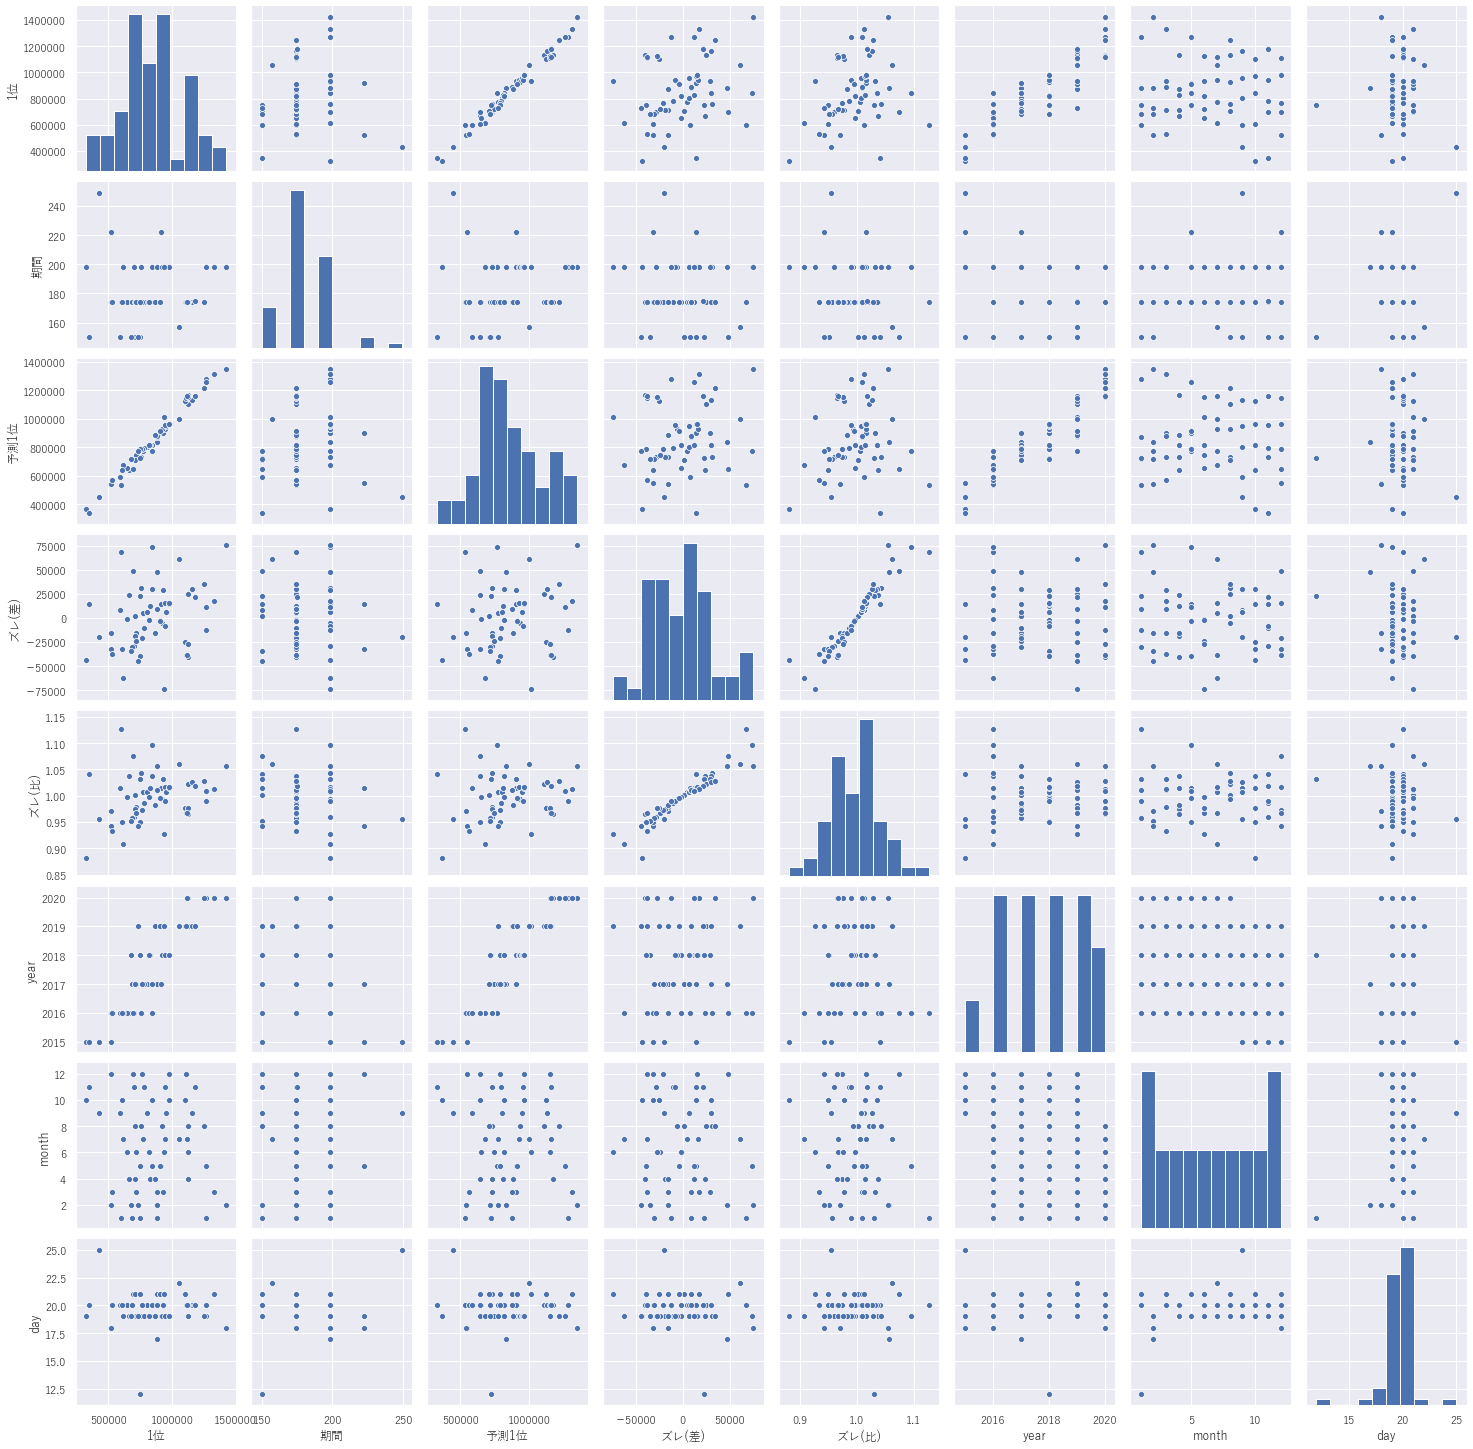

In [73]:
sns.set(font='Yu Gothic')
sns.pairplot(df)

* 結構、うまくフィットした
* トレンドは結構なめらかになり、係数が急にシフトする時がある
  * 「性能の高いキャラの追加」「グランドライブの実装」など、時間効率に影響する要因がコッチに乗ったと思われる

## 次のイベント予測

調子良さそうなので、↑のデータの次に開催された「オレンジタイム」の1位ポイントを予測してみる
* オレンジタイム
  * 開催日：2020/09/20
  * 期間：174h
  * １位ポイント（答え）：1,250,000

In [18]:
# 「オレンジタイム」の情報
pred_event_info = {
    '日付': datetime.date(2020, 9, 20),
    '期間': 174.0,
    '1位': 1250000,
}
pred_event_info

{'日付': datetime.date(2020, 9, 20), '期間': 174.0, '1位': 1250000}

### stanデータ準備

In [16]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
    'pred_term': 1,
    'pred_len' : [pred_event_info['期間']]
}

In [11]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
  int pred_term; // 予測期間の長さ
  vector[pred_term] pred_len; // 予測イベントのイベント期間(h)
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準+ドリフト成分の推定値
  vector[T] delta;   // ドリフト成分の推定値
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_z; // ドリフト成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
  real<lower=0> s_t; // lenの係数の変化を表す標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1] + delta[i-1], s_w);
    delta[i] ~ normal(delta[i-1], s_z);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
generated quantities{
  vector[T + pred_term] delta_pred;
  vector[T + pred_term] mu_pred;
  vector[T + pred_term] b_len_pred;   // lenの係数
  vector[T + pred_term] alpha_pred;
  delta_pred[1:T] = delta;
  mu_pred[1:T] = mu;
  b_len_pred[1:T] = b_len;
  alpha_pred[1:T] = alpha;
  for(i in 1:pred_term){
    delta_pred[T+i] = normal_rng(delta_pred[T+i-1], s_z);
    mu_pred[T+i] = normal_rng(mu_pred[T+i-1]+delta[T+i-1], s_w);
    b_len_pred[T+i] = normal_rng(b_len_pred[T+i-1], s_t);
    alpha_pred[T+i] = mu_pred[T+i] + b_len_pred[T+i] * pred_len[i];
  }
}
"""

### Stan実行

In [12]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_321a73203f293d4a69c4a783b9abcfe9 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpem9e6vdm\stanfit4anon_model_321a73203f293d4a69c4a783b9abcfe9_135685411010381919.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 36.4 s


In [27]:
# パラメータ設定
n_itr = 5000
n_warmup = n_itr - 1000
chains = 3

In [28]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 1min 14s


In [29]:
# ファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c4_3_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c4_3_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


### 結果確認

In [19]:
# 読み込み
input_dir = '../event_data/'
with open(input_dir + 'c4_3_model.pickle', mode="rb") as f:
    stm = pickle.load(f)
with open(input_dir + 'c4_3_fit.pickle', mode="rb") as f:
    fit = pickle.load(f)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
fit

Inference for Stan model: anon_model_321a73203f293d4a69c4a783b9abcfe9.
3 chains, each with iter=5000; warmup=4000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

                 mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]       2156.7   75.63 926.32 335.49 1505.8 2208.9 2831.2 3861.4    150   1.02
b_len[1]       2153.3   76.73 898.12  407.4 1509.8 2189.6 2818.5 3806.3    137   1.02
b_len[2]       2305.6   70.98 860.59 614.29 1732.1 2343.2 2922.9 3901.2    147   1.02
b_len[3]       2405.0   61.58 766.62 997.91 1862.2 2421.1 2934.7 3845.2    155   1.02
b_len[4]       2671.0   31.86 712.36 1295.6 2182.5 2687.1 3150.6 4017.0    500   1.01
b_len[5]       2624.4   35.35 736.45 1149.6 2110.0 2649.7 3118.7 4034.8    434   1.01
b_len[6]       2668.0   34.88 729.98 1256.6 2176.0 2696.7 3145.6 4078.5    438   1.01
b_len[7]       2895.7   26.57 669.49 1597.6 2438.2 2892.2 3336.9 4218.5    635    1.0
b_len[8]       3044.3   23.34 628.48 

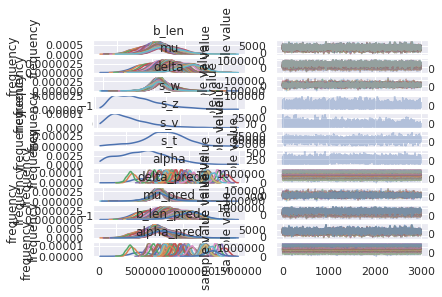

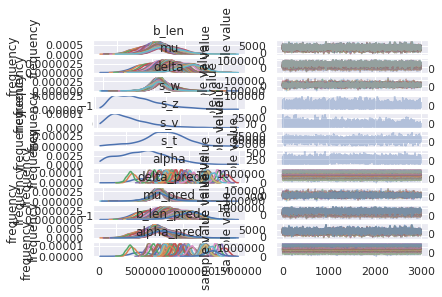

In [21]:
fit.plot()

### 予測結果確認

In [20]:
#x軸
X = df.index
X_pred = df.index.tolist()
X_pred.append(pred_event_info['日付'])

#結果を抽出
ms = fit.extract() 

# alpha
# 事後平均
alpha_mean = ms['alpha_pred'].mean(axis=0)
# #パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_25 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 25), axis=0))
alpha_75 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 75), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

#mu
# 事後平均
mu_mean = ms['mu_pred'].mean(axis=0)
#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len_pred'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len_pred']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len_pred']).apply(lambda x: np.percentile(x, 95), axis=0))

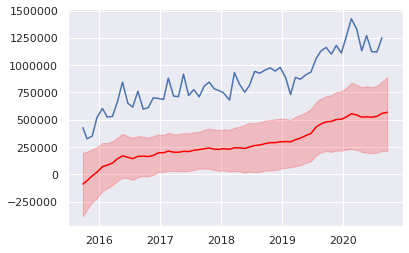

In [21]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, mu_mean, label='trend', c='red')
plt.fill_between(X_pred, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

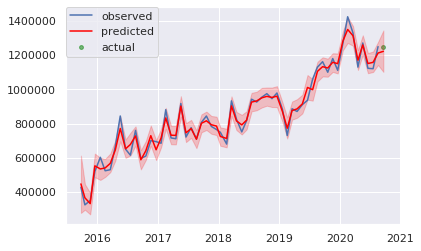

In [36]:
# alpha
# 90%区間
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, alpha_mean, label='predicted', c='red')
ax.scatter(pred_event_info['日付'], pred_event_info['1位'], c='green', alpha=0.5, s=15, label='actual')
plt.fill_between(X_pred, alpha_5, alpha_95, color='red', alpha=0.2)
plt.legend(loc='upper left', borderaxespad=0)
plt.show()

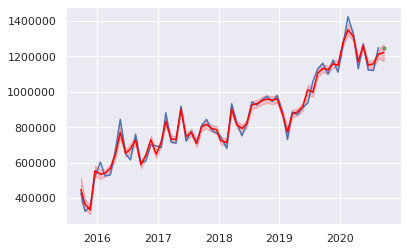

In [29]:
# alpha
# 50%区間
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X_pred, alpha_mean, label='predicted', c='red')
ax.scatter(pred_event_info['日付'], pred_event_info['1位'], c='green', alpha=0.5, s=10)
plt.fill_between(X_pred, alpha_25, alpha_75, color='red', alpha=0.2)
plt.show()

In [24]:
# 点推定
print('点推定:', alpha_mean[-1])
# 区間推定
print('区間推定(90%):', alpha_5[-1], '~', alpha_95[-1])
print('区間推定(50%):', alpha_25[-1], '~', alpha_75[-1])
# 実際の値
print('実測値', pred_event_info['1位'])

点推定: 1222457.667048828
区間推定(90%): 1102110.2576605086 ~ 1344647.4029331487
区間推定(50%): 1172790.1907428827 ~ 1271708.4247498484
実測値 1250000


* 予測値
  * 点推定：1,222,457
  * 区間推定(90%)：1,102,110 ~ 1,344,647
  * 区間推定(50%)：1,172,790 ~ 1,271,708
* 実測値
  * 1,250,000
* 所感
  * 90%区間に入っている。結構良いのでは？
  * 今回は50%区間にも入っている。